In [1]:
import numpy as np
import maze as mz 
import pandas as pd

# Problem 1: The Maze and the Random Minotaur

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 3, 0, 1, 1, 1],
    
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])


In [3]:
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze and start of minotaur
# 3 = minotour position 
# 5 = if minotour and exit are in the same place

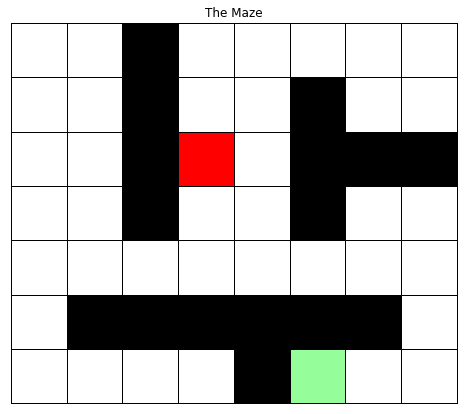

In [4]:
mz.draw_maze(maze)

In [5]:
env = mz.Maze(maze)
#env.show()


In [6]:
T  = 20
V, policy = mz.dynamic_programming(env, T);

minotaur = dict()
minotaur[0] = env.minotaur
pol = np.zeros([policy.shape[0],T])
pol[:,0] = policy[:,0]
env.update()
for i in range(T-1):
    minotaur[i+1] = env.minotaur
    t = T-i-1
    V, policy = mz.dynamic_programming(env, t)
    pol[:,i+1] = policy[:,0]
    env.update()
#print(pol)



#mz.draw_maze(env.maze)

## Simulation

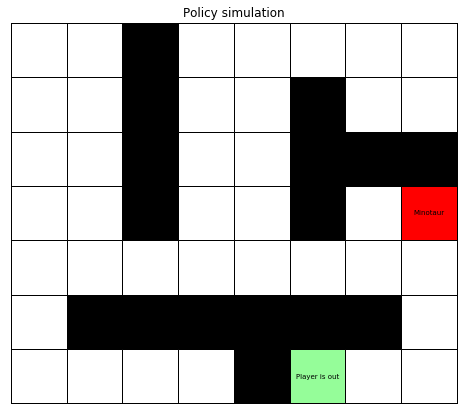

In [7]:
path = env.simulate((1,1),pol,'DynProg')

mz.animate_solution(env.maze_origin, path, minotaur)